## Perceptrón
## Predecir imágenes

**Nombre:** David L. Mejía<br>
**Fecha:** 03/10/2025<br>
**Git:** https://github.com/mcdavidleonardo/MachineLearning2/blob/master/Perceptron_Imagenes.ipynb<br>

En este ejercicio práctico vamos a utilizar el Perceptrón para solucionar un problema más complejo
que el anterior. En este caso, nuestro objetivo será clasificar un conjunto de imágener en base al
número que se muestra en las mismas.

In [1]:
# Importamos el conjunto de datos
from sklearn.datasets import fetch_openml
# Añadimos as_frame=False para forzar la devolución de un array
mnist = fetch_openml('mnist_784', as_frame=False)

In [2]:
mnist.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [3]:
28*28

784

#### Visualización del conjunto de datos

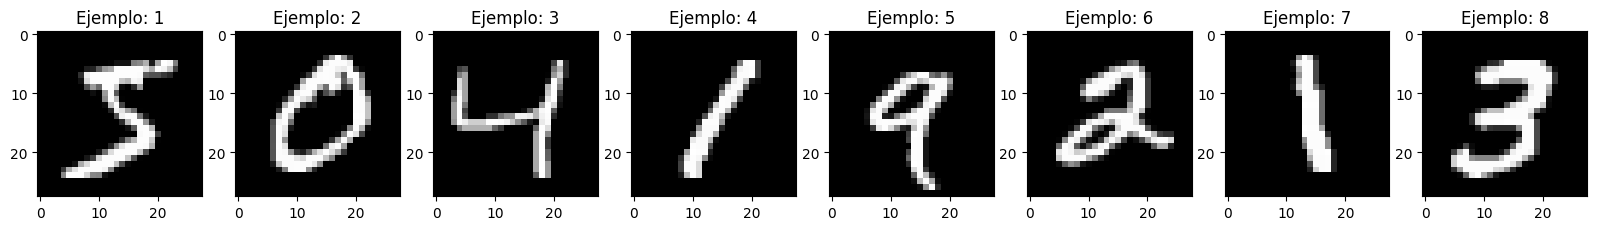

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for index, digit in zip(range(1, 9), mnist.data[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(digit, (28,28)), cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

In [6]:
# Conviertiendo el conjunto de datos en un DataFrame de Pandas
import pandas as pd

df = pd.DataFrame(mnist.data)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### División del conjunto de datos

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target,test_size=0.1)

#### Entrenamiento del algoritmo

In [8]:
from sklearn.linear_model import Perceptron

clf = Perceptron(max_iter=2000, random_state=40, n_jobs=-1)
clf.fit(X_train, y_train)


,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,2000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,-1
,random_state,40


In [9]:
# Número de parámetros que forman el modelo
clf.coef_.shape


(10, 784)

In [10]:
# Parámetros bias/intercept
clf.intercept_


array([-2163.,  -392., -1538., -5003.,  -977.,  1365., -1405.,  -176.,
       -8320., -3205.])

#### Predicción con el conjunto de pruebas

In [11]:
# Realizamos la predicción con el conjunto de datos de prueba
y_pred = clf.predict(X_test)

In [12]:
len(y_test)

7000

In [13]:
# Mostramos el f1_score resultante de la clasificación
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average="weighted")

0.8676425685112212

#### Mostrar imágenes mal clasificadas

In [14]:
import numpy as np
import matplotlib.pyplot as plt

index = 0
index_errors = []

for label, predict in zip(y_test, y_pred):
    if label != predict:
        index_errors.append(index)
    index += 1

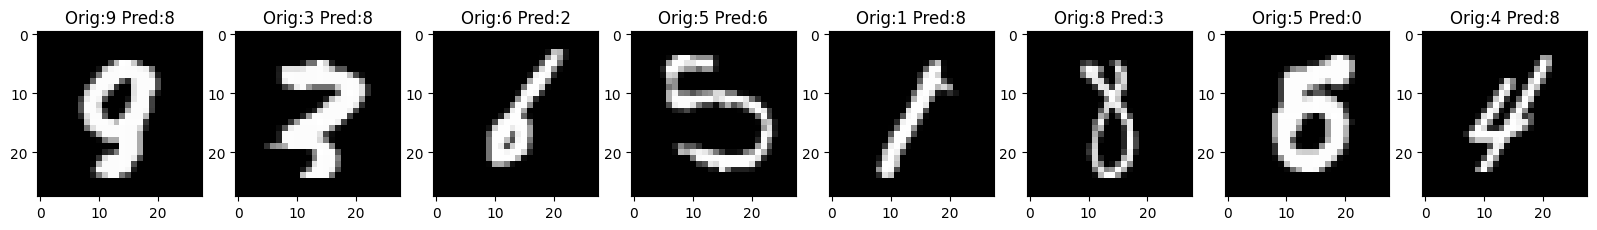

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for i, img_index in zip(range(1, 9), index_errors[8:16]):
    plt.subplot(1, 8, i)
    plt.imshow(np.reshape(X_test[img_index], (28,28)), cmap=plt.cm.gray)
    plt.title('Orig:' + str(y_test[img_index]) + ' Pred:' + str(y_pred[img_index]))
    
plt.show()